In [1]:
!pip install --upgrade --user git+https://github.com/GeneralMills/pytrends

  Cloning https://github.com/GeneralMills/pytrends to /tmp/pip-req-build-lfz89o08
  Running command git clone -q https://github.com/GeneralMills/pytrends /tmp/pip-req-build-lfz89o08
  Created wheel for pytrends: filename=pytrends-4.7.3-cp36-none-any.whl size=15250 sha256=732e1e56480fe6fc42f6e8332d098d8c16f6bd2bed5e65235bc8dbb10fedbb73
  Stored in directory: /tmp/pip-ephem-wheel-cache-fh4rk91x/wheels/f6/49/f7/a4785ff2079f1cc793186a60d40863c5d4ee9863e2b315a0bd
Successfully built pytrends


In [ ]:
import pandas as pd
from pytrends.request import TrendReq

# Entendendo o uso da lib

In [ ]:
pytrend = TrendReq(hl='BR', tz = 360)
keywords = ['fone de ouvido','celular','computador']
pytrend.build_payload(
     kw_list=keywords,
     cat=0,
     timeframe='today 3-m',
     geo='BR',
     gprop='')
data = pytrend.interest_over_time()
# data.to_csv('Py_VS_R.csv', encoding='utf_8_sig')

In [ ]:
data

,fone de ouvido,celular,computador,isPartial
date,,,,
2020-05-02,4,100,11,False
2020-05-03,4,96,10,False
2020-05-04,4,93,12,False
2020-05-05,5,93,11,False
2020-05-06,4,92,12,False
...,...,...,...,...
2020-07-26,4,91,10,False
2020-07-27,4,86,12,False
2020-07-28,4,86,11,False


(0.0, 104.8)

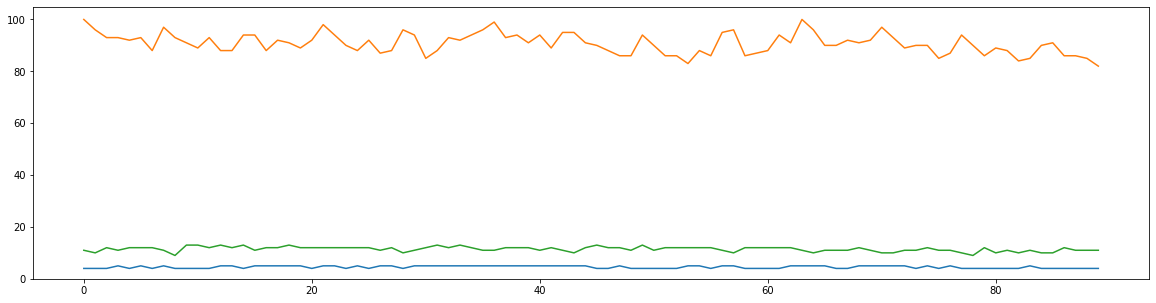

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
# image = data.plot(title = 'Python V.S. R in last 3 months on Google Trends')
plt.plot(data.reset_index()[['fone de ouvido', 'celular','computador']])
plt.ylim(ymin = 0)

In [ ]:
# Sugestões dado uma palavra de busca
pytrend = TrendReq(hl='pt-BR', tz = 50)
keywords = pytrend.suggestions(keyword='computador')
df = pd.DataFrame(keywords)
df.drop(columns= 'mid')   # This column makes no sense

,title,type
0,Computador,Assunto
1,Laptop,Assunto
2,Computador pessoal,Assunto
3,Monitor de vídeo,Assunto
4,computador de secretária,Assunto


# Pré consolidação de uma função que retorna um score de perfil de consumo

In [ ]:
import pandas as pd
from pytrends.request import TrendReq
import argparse

import numpy as np
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

# Falta consolidar o argparse
args = {'kw': ['fogão','microondas', 'geladeira'],
        'me': '3'}


pytrend = TrendReq(hl='BR', tz = 360)

results = pd.DataFrame()
scores = []

me = args['me']

for k in args['kw']:
  pytrend.build_payload(
      kw_list=[k],
      cat=0,
      timeframe=f'today {me}-m',
      geo='BR',
      gprop='')
  data = pytrend.interest_over_time().reset_index()
  scores.append(np.mean(moving_average(data[k].diff(1).fillna(0).values, n = 5)))

  results[k] = data[k]

ordered = pd.DataFrame({'produto': args['kw'], 'score':scores})

In [ ]:
ordered.sort_values(by='score', ascending = False)

,produto,score
0,fogão,0.074419
2,geladeira,-0.025581
1,microondas,-0.065116


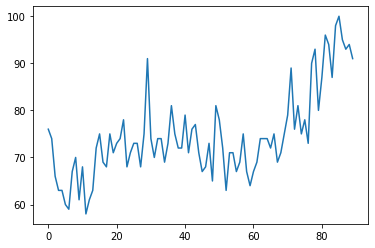

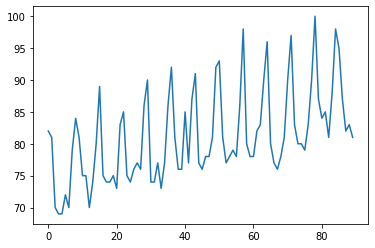

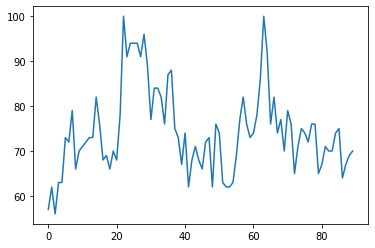

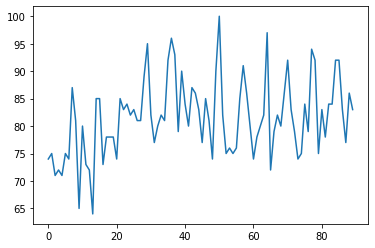

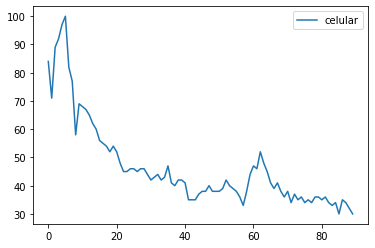

In [ ]:
plt.plot(results['camiseta'], label = 'camiseta')

plt.show()

plt.plot(results['carro'], label ='carro')

plt.show()

plt.plot(results['calça'], label ='calça')

plt.show()

plt.plot(results['sapato'], label ='geladeira')

plt.show()

plt.plot(results['mascara'], label ='celular')

plt.legend()


plt.show()

# Testes de mais funcionamentos da lib

In [ ]:
pytrend.trending_searches(pn='brazil')

,0
0,Arsenal x Chelsea
1,TikTok
2,Juventus
3,Benfica x Porto
4,F1
5,Paysandu
6,Dia Mundial da Amamentação
7,Milan x Cagliari
8,Sars
9,1 de agosto


In [ ]:
pytrend.top_charts(202007, hl='pt-BR', tz=300, geo='BR')

In [ ]:
data = pytrend.get_historical_interest(['celular'], year_start=2020, month_start=5, day_start=1, hour_start=0, year_end=2020,
                                 month_end=5, day_end=2, hour_end=0, cat=0, geo='BR', gprop='', sleep=0)

In [ ]:
data

,celular,isPartial
date,,
2020-05-01 00:00:00,89,False
2020-05-01 01:00:00,90,False
2020-05-01 02:00:00,87,False
2020-05-01 03:00:00,84,False
2020-05-01 04:00:00,83,False
2020-05-01 05:00:00,86,False
2020-05-01 06:00:00,83,False
2020-05-01 07:00:00,86,False
2020-05-01 08:00:00,85,False


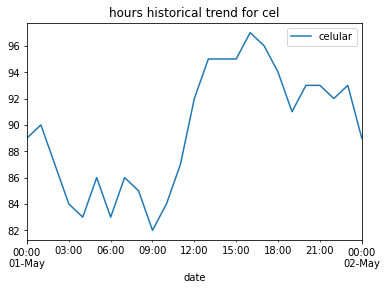

In [ ]:
image = data.plot(title = 'hours historical trend for cel')

# Testando lib encapsulada

In [2]:
! git clone https://github.com/lucashueda/datathon_santander_2020.git

Cloning into 'datathon_santander_2020'...
remote: Enumerating objects: 23, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 49 (delta 12), reused 17 (delta 7), pack-reused 26
Unpacking objects: 100% (49/49), done.


In [3]:
%cd datathon_santander_2020

/content/datathon_santander_2020


In [4]:
!python3 main.py

Using TensorFlow backend.
2020-08-02 23:47:46.588815: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2020-08-02 23:47:49.953476: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-08-02 23:47:50.017683: E tensorflow/stream_executor/cuda/cuda_driver.cc:313] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2020-08-02 23:47:50.017892: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (87b9a90edd26): /proc/driver/nvidia/version does not exist
2020-08-02 23:47:50.046578: I tensorflow/core/platform/profile_utils/cpu_utils.cc:102] CPU Frequency: 2200000000 Hz
2020-08-02 23:47:50.046889: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x2fb1480 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2020-08-02 23:47:5

In [6]:
!ls

inventario.csv	local_ordered.csv  model_weights  test_images
LICENSE		main.py		   README.md	  trends.py


In [9]:
!python3 trends.py --kw Roteador Impressora Fone --me '12'

['Roteador', 'Impressora', 'Fone'] 12


In [10]:
!ls

inventario.csv	local_ordered.csv  model_weights  test_images
LICENSE		main.py		   README.md	  trends.py


In [11]:
import pandas as pd
pd.read_csv('local_ordered.csv')

,produto,score
0,Roteador,0.329167
1,Impressora,0.283333
2,Fone,0.212500
